Initialization

In [53]:
# set your working director to analysis data
import os
os.chdir('C:/Users/kenne/OneDrive/Desktop/QBIO490/qbio_490_kenneth/analysis_data')
os.environ["OMP_NUM_THREADS"] = '1'

# import cptac, numpy, and pandas
import cptac
import numpy as np
import pandas as pd
import seaborn as sns

# other imports
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# download the Brca dataset
cptac.download(dataset="BRCA")
brca = cptac.Brca()

# extract the data
clinical_data = brca.get_clinical()
transcriptomic_data = brca.get_transcriptomics()
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

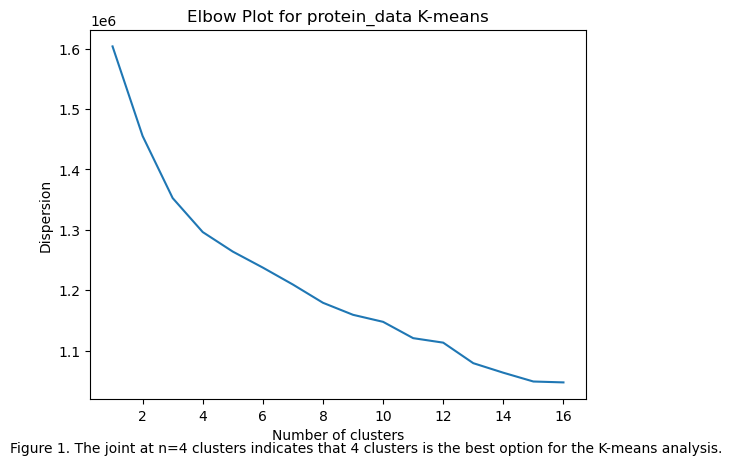

In [106]:
protein_data = protein_data.dropna(axis=1)
kmeanslist = [0]*16
for i in range(1,17):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
    kmeans.fit(protein_data)
    kmeanslist[i-1] = kmeans.inertia_
plt.plot(range(1, 17), kmeanslist)
plt.title("Elbow Plot for protein_data K-means")
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.figtext(0, 0, "Figure 1. The joint at n=4 clusters indicates that 4 clusters is the best option for the K-means analysis.")
plt.show()


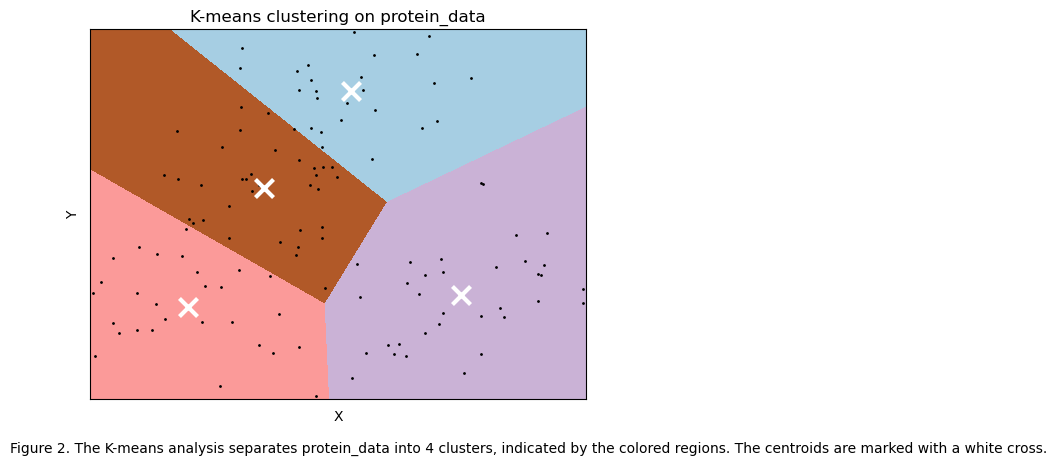

In [107]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = protein_data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on protein_data"
    
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('X')
plt.ylabel('Y')
plt.figtext(0, 0, "Figure 2. The K-means analysis separates protein_data into 4 clusters, indicated by the colored regions. The centroids are marked with a white cross.")
plt.show()

In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r"C:\Users\kenne\OneDrive\Desktop\QBIO490\qbio_490_kenneth\analysis_data\brca_rna_clincial_data.csv", header=0, delim_whitespace=True, on_bad_lines='skip')
from sklearn.preprocessing import StandardScaler

#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(handle_unknown='ignore')
#df_adjusted = onehotencoder.fit_transform(df).toarray()

columnstr = "gender"
targets = ["female", "male"]
#df_temp = df.reindex(columns=targets)
#targets = ["not hispanic", "hispanic or latino", "not reported"]

df = df.transpose()
features = df.columns
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,[columnstr]].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[[columnstr]]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[columnstr] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ,"b

KeyError: "['gender'] not in index"

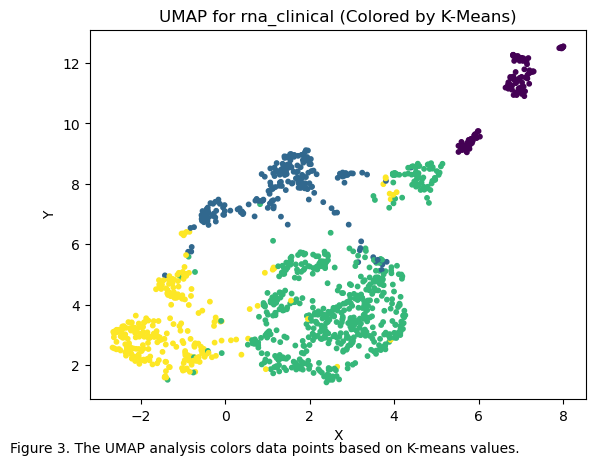

In [108]:
rna_clinical = pd.read_csv(r"C:\Users\kenne\OneDrive\Desktop\QBIO490\qbio_490_kenneth\analysis_data\brca_rna_clincial_data.csv")

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
rna_clinical = onehotencoder.fit_transform(rna_clinical).toarray()

mapper = umap.UMAP().fit_transform(rna_clinical)

kmeans_labels = cluster.KMeans(n_clusters=4).fit_predict(rna_clinical)
plt.scatter(mapper[:, 0], mapper[:, 1], c=kmeans_labels, s=10);
plt.title("UMAP for rna_clinical (Colored by K-Means)")
plt.xlabel('X')
plt.ylabel('Y')
plt.figtext(0, 0, "Figure 3. The UMAP analysis colors data points based on K-means values.")
plt.show()

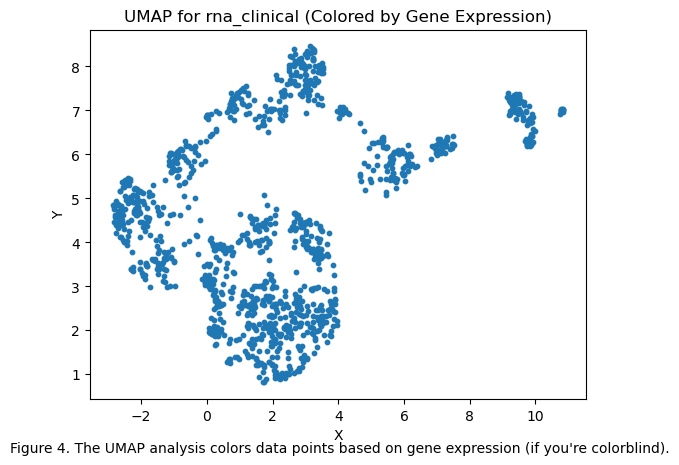

In [117]:
import sklearn.cluster as cluster
import umap
import random
rna_clinical = pd.read_csv(r"C:\Users\kenne\OneDrive\Desktop\QBIO490\qbio_490_kenneth\analysis_data\brca_rna_clincial_data.csv")

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
rna_clinical = onehotencoder.fit_transform(rna_clinical).toarray()

mapper = umap.UMAP().fit_transform(rna_clinical)

gene_labels = rna_clinical
plt.scatter(mapper[:, 0], mapper[:, 1], s=10, cmap="rainbow");
plt.title("UMAP for rna_clinical (Colored by Gene Expression)")
plt.xlabel('X')
plt.ylabel('Y')
plt.figtext(0, 0, "Figure 4. The UMAP analysis colors data points based on gene expression (if you're colorblind).")
plt.show()

C:\Users\kenne\miniconda3\envs\qbio490_kenneth\lib\site-packages\seaborn\matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Figure 5. A hierarchal clustering heatmap for rna_clinical data.


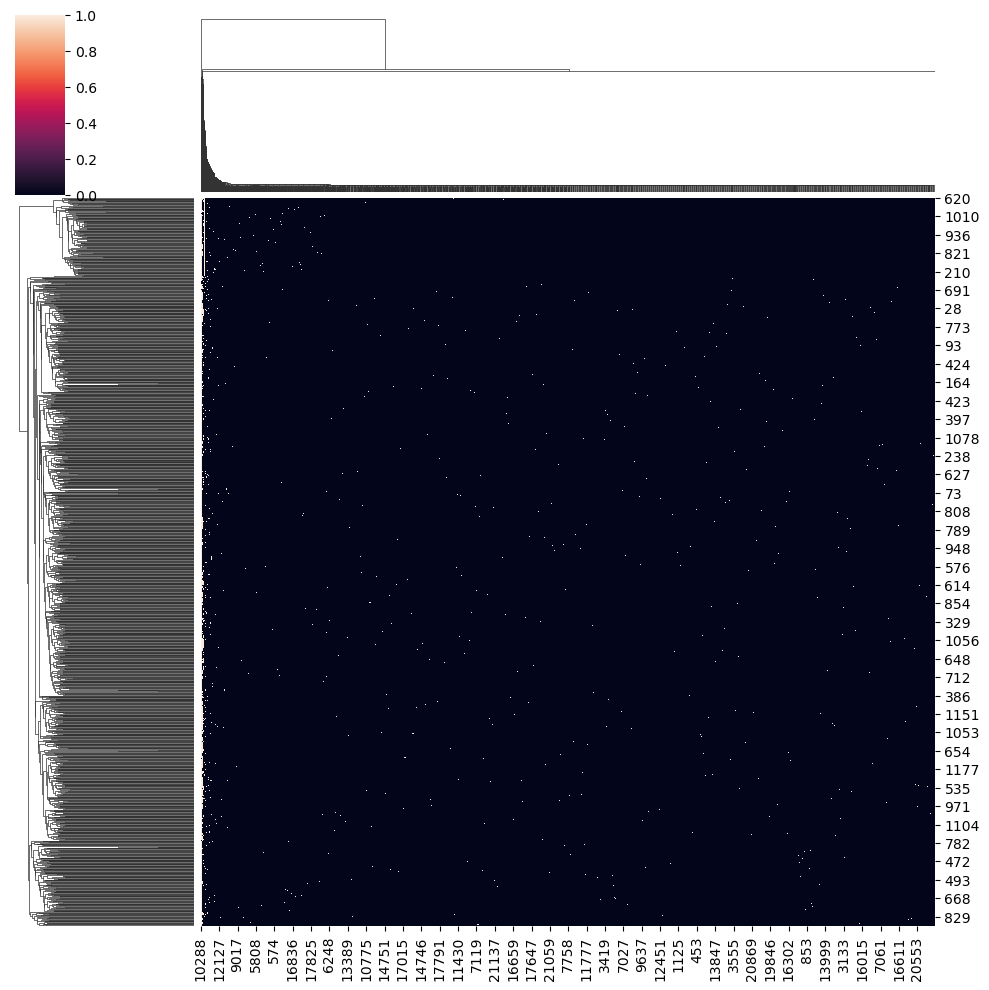

In [111]:
sns.clustermap(rna_clinical, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None)
print("Figure 5. A hierarchal clustering heatmap for rna_clinical data.")

a. When plotting the figures, I was surprised by how much the graphs varied every time they are re-plotted. I expected the variability across different runs to be much less. I was also surprised by whatever got produced in my attempt to produce a hierarchal clustering heatmap with the rna_clinical data.
b. I would like to know if each cluster has any clinical significance or noteworthy clinical characteristics. I can determine this by analyzing the clustered data points to see if there are any statistically significant differences for any clinical variables.
c. You could use the intersect(function) to plot only patients that are included in both dataframes. This could be used to produce a K-means cluster only for patients in both dataframes or a UMAP analysis for patients that are in both dataframes. This would likely result in a reduced number of clusters due to the reduced amount of data.

See ML_sketch.jpg (week 11 folder) for the two sketches for question c.